In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import joblib

# Cargar el dataset
data = pd.read_csv('Berlin_Marathon_Adjusted_AverageTime.csv')

# Excluir la variable 'YEAR'
data = data.drop(columns=['YEAR'])

# Mapeo para la columna RunType
runtype_mapping = {'Outdoor': 0, 'Track': 1, 'Trail': 2, 'Treadmill': 3}
data['RunType'] = data['RunType'].map(runtype_mapping)

# Procesar CrossTraining para convertir horas a valores numéricos
data['CrossTraining'] = data['CrossTraining'].str.extract(r'(\d+)').astype(float).fillna(0)

# Codificación de variables categóricas
data = pd.get_dummies(data, columns=['GENDER', 'Category'], drop_first=True)

# Selección de características y variable objetivo
X = data.drop(columns=['Average_MarathonTime'])
y = data['Average_MarathonTime']

# Eliminar filas con valores nulos
X = X.dropna()
y = y[X.index]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Guardar el modelo y el escalador
joblib.dump(ridge_model, 'ridge_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

# Hacer predicciones y evaluar el modelo
y_pred = ridge_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

# Función para hacer predicciones usando el modelo guardado
def predict_marathon_time(input_data):
    # Cargar el modelo y el escalador
    model = joblib.load('ridge_model.joblib')
    scaler = joblib.load('scaler.joblib')
    
    # Convertir el input_data en un DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Mapear RunType y procesar CrossTraining
    input_df['RunType'] = input_df['RunType'].map(runtype_mapping)
    input_df['CrossTraining'] = input_df['CrossTraining'].str.extract(r'(\d+)').astype(float).fillna(0)
    
    # Crear variables dummy y asegurar columnas
    if 'GENDER' in input_df.columns:
        input_df = pd.get_dummies(input_df, columns=['GENDER'], drop_first=True)
    if 'Category' in input_df.columns:
        input_df = pd.get_dummies(input_df, columns=['Category'], drop_first=True)
    
    # Asegurarse de que las columnas coincidan con el conjunto de entrenamiento
    input_df = input_df.reindex(columns=X.columns, fill_value=0)
    
    # Escalar los datos de entrada
    input_scaled = scaler.transform(input_df)
    
    # Hacer la predicción
    prediction = model.predict(input_scaled)
    return prediction[0]

# Ejemplo de uso con la columna 'YEAR' eliminada
sample_input = {
    'AGE': 30,
    'RunType': 'Outdoor',
    'SubTime': 3.0,
    'SubDistance': 10.0,
    'Wall21': 1.5,
    'km4week': 50.0,
    'sp4week': 12.0,
    'CrossTraining': '5h',
    'Wall21_Marathon': 1.2,
    'PRECIP_mm': 0,
    'SUNSHINE_hrs': 5,
    'CLOUD_hrs': 3,
    'ATMOS_PRESS_mbar': 1013,
    'AVG_TEMP_C': 15,
    'MAX_TEMP_C': 20,
    'MIN_TEMP_C': 10,
    # Las variables dummy se añadirán automáticamente
}

predicted_time = predict_marathon_time(sample_input)
print(f'Predicted Average Marathon Time: {predicted_time:.2f} hours')


MAE: 0.1652975937580439
RMSE: 0.21349388524552285
Predicted Average Marathon Time: 4.60 hours


C:\Users\ramir\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


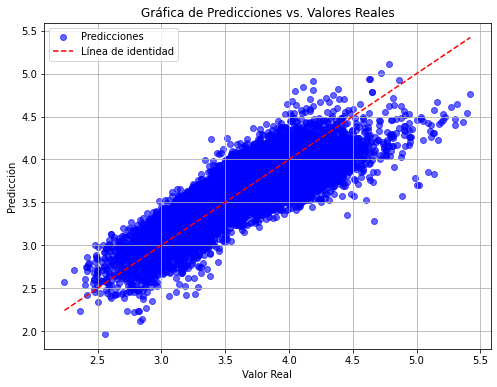

In [9]:
import matplotlib.pyplot as plt

# Predicciones en el conjunto de prueba
y_pred = ridge_model.predict(X_test_scaled)

# Crear la gráfica de Predicciones vs Valores Reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea de identidad')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Gráfica de Predicciones vs. Valores Reales')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import pandas as pd
import joblib

# Diccionario de mapeo para RunType
runtype_mapping = {'Outdoor': 0, 'Track': 1, 'Trail': 2, 'Treadmill': 3}

# Función para hacer predicciones usando el modelo guardado
def predict_marathon_time(input_data):
    # Cargar el modelo y el escalador
    model = joblib.load('ridge_model.joblib')
    scaler = joblib.load('scaler.joblib')
    
    # Convertir el input_data en un DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Mapear RunType y procesar CrossTraining
    input_df['RunType'] = input_df['RunType'].map(runtype_mapping)
    input_df['CrossTraining'] = input_df['CrossTraining'].str.extract(r'(\d+)').astype(float).fillna(0)
    
    # Asegurarse de que las columnas dummy estén presentes en el DataFrame
    if 'GENDER' in input_df.columns:
        input_df = pd.get_dummies(input_df, columns=['GENDER'], drop_first=True)
    if 'Category' in input_df.columns:
        input_df = pd.get_dummies(input_df, columns=['Category'], drop_first=True)
    
    # Asegurarse de que las columnas coincidan con las del conjunto de entrenamiento
    input_df = input_df.reindex(columns=X.columns, fill_value=0)
    
    # Escalar los datos de entrada
    input_scaled = scaler.transform(input_df)
    
    # Hacer la predicción
    prediction = model.predict(input_scaled)
    return prediction[0]

# Ejemplo de uso
sample_input = {
    'AGE': 30,
    'RunType': 'Outdoor',
    'SubTime': 1.0,
    'SubDistance': 10.0,
    'Wall21': 1.5,
    'km4week': 50.0,
    'sp4week': 12.0,
    'CrossTraining': '5h',
    'Wall21_Marathon': 1.2,
    'PRECIP_mm': 0,
    'SUNSHINE_hrs': 5,
    'CLOUD_hrs': 3,
    'ATMOS_PRESS_mbar': 1013,
    'AVG_TEMP_C': 15,
    'MAX_TEMP_C': 20,
    'MIN_TEMP_C': 10,
    # Las variables dummy se añadirán automáticamente
}

predicted_time = predict_marathon_time(sample_input)
print(f'Predicted Average Marathon Time: {predicted_time:.2f} hours')


Predicted Average Marathon Time: -2.24 hours


In [7]:
# Verificar los valores de entrada antes y después del escalado
def predict_marathon_time_debug(input_data):
    # Cargar el modelo y el escalador
    model = joblib.load('ridge_model.joblib')
    scaler = joblib.load('scaler.joblib')
    
    # Convertir input_data en DataFrame
    input_df = pd.DataFrame([input_data])
    input_df['RunType'] = input_df['RunType'].map(runtype_mapping)
    input_df['CrossTraining'] = input_df['CrossTraining'].str.extract(r'(\d+)').astype(float).fillna(0)
    
    # Crear variables dummy y asegurar columnas
    if 'GENDER' in input_df.columns:
        input_df = pd.get_dummies(input_df, columns=['GENDER'], drop_first=True)
    if 'Category' in input_df.columns:
        input_df = pd.get_dummies(input_df, columns=['Category'], drop_first=True)
    
    # Asegurarse de que las columnas coincidan con el conjunto de entrenamiento
    input_df = input_df.reindex(columns=X.columns, fill_value=0)
    
    # Verificar el DataFrame antes del escalado
    print("Valores de entrada antes del escalado:", input_df)
    
    # Escalar los datos de entrada
    input_scaled = scaler.transform(input_df)
    
    # Verificar los valores escalados
    print("Valores escalados de entrada:", input_scaled)
    
    # Hacer la predicción
    prediction = model.predict(input_scaled)
    print("Predicción sin ajuste:", prediction[0])
    
    return prediction[0]

# Usa la función de depuración
predicted_time_debug = predict_marathon_time_debug(sample_input)
print(f'Predicted Average Marathon Time (Debug): {predicted_time_debug:.2f} hours')


Valores de entrada antes del escalado:    YEAR  AGE  RunType  SubTime  SubDistance  Wall21  km4week  sp4week  \
0     0   30        0      1.0         10.0     1.5     50.0     12.0   

   CrossTraining  Wall21_Marathon  ...  ATMOS_PRESS_mbar  AVG_TEMP_C  \
0            5.0              1.2  ...              1013          15   

   MAX_TEMP_C  MIN_TEMP_C  GENDER_male  Category_M45  Category_M50  \
0          20          10            0             0             0   

   Category_M55  Category_MAM  Category_WAM  
0             0             0             0  

[1 rows x 23 columns]
Valores escalados de entrada: [[-1.95546056e+02 -3.94992030e-01 -1.33228470e+00  3.85760630e-02
  -6.67063659e-02 -1.40438201e+00 -4.19203178e-01 -1.35308930e-01
   2.94807108e+00 -2.01907713e+00 -3.42290999e-01 -1.84104445e-01
  -5.38768839e-01  5.32702463e-02  6.99695894e-01  3.65633545e-01
   4.77962768e-01 -4.54033625e+00 -3.30513411e-01 -1.43896596e-01
  -8.93365127e-02 -1.52518519e+00 -1.33628861e-01]]
P